### Data Prep

In [9]:
# imports 
import pandas as pd
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# food/drink tables
food = pd.read_csv('food.csv')
food_sub = pd.read_csv('food_sub.csv')
drink = pd.read_csv('drink.csv')
drink_sub = pd.read_csv('drink_sub.csv')

food.rename(columns = {'food':'food/drink', 'foodLabel': 'food/drinkLabel'}, inplace = True)
food_sub.rename(columns = {'food':'food/drink', 'foodLabel': 'food/drinkLabel'}, inplace = True)
drink.rename(columns = {'drinks':'food/drink', 'drinksLabel': 'food/drinkLabel'}, inplace = True)
drink_sub.rename(columns = {'drinks':'food/drink', 'drinksLabel': 'food/drinkLabel'}, inplace = True)

df = pd.concat([food,food_sub, drink, drink_sub], ignore_index=True)

# extract the entity label
for i in ['food/drink','instance_of','subclass_of','ingredient']:
     df[i] = df[i].str.replace('http://www.wikidata.org/entity/', '', regex = False)
        
# capitalize each word
for i in df.columns:
    df[i] = df[i].str.title()

In [11]:
# language tables
food_lang1 = pd.read_csv('food_lang1.csv')
food_lang2 = pd.read_csv('food_lang2.csv')
drink_lang = pd.read_csv('drink_lang.csv')
other_lang = pd.read_csv('other_lang.csv')
allergen_lang = pd.read_csv('allergen_lang.csv')

food_lang1.rename(columns = {'food':'item', 'foodLabel': 'itemLabel'}, inplace = True)
food_lang2.rename(columns = {'food':'item', 'foodLabel': 'itemLabel'}, inplace = True)
drink_lang.rename(columns = {'drinks':'item', 'drinksLabel': 'itemLabel'}, inplace = True)

lang_df = pd.concat([food_lang1, food_lang2, drink_lang, other_lang, allergen_lang], ignore_index=True)

lang_df['item'] = lang_df['item'].str.replace('http://www.wikidata.org/entity/','', regex = False)
lang_df['itemLabel'] = lang_df['itemLabel'].str.title()
lang_df['label'] = lang_df['label'].str.title()

In [12]:
# allergens
allergen_dict = {}
milk_allergy = ['Dairy Product', 'Butter', 'Buttermilk', 'Casein', 'Custard', 'Pudding', 'Cheese', 
                 'Cottage Cheese', 'Cream', 'Ghee', 'Half And Half', 'Lactose', 'Milk', 'Cow’s Milk', 'Goat milk',
                 'Nougat', 'Rennet', 'Sour Cream', 'Whey', 'Yogurt', 'Malted Milk', 'Raw Milk', 'Sheep Milk', 
                 'Milk Pasteurization', 'Condensed Milk', 'Sweetened Condensed Milk', 'Mare Milk', 'Yak Milk', 
                 'Baked Milk', 'Soured Milk', 'Milk Proteins', 'Milk Chocolate', 'Semi-Skimmed Milk', 
                 'Skimmed Milk', 'Buffalo Milk', 'Milk Powder', 'Camel Milk']
egg_allergy = ['Egg Dish', 'Egg', 'Chicken Egg', 'Egg White', 'Egg Yolk', 'Hard-Boiled Egg', 'Boiled Egg', 
               'Poached Egg', 'Century Egg', 'Fried Egg', 'Scrambled Eggs', 'Egg Wash', 'Duck Egg', 
               'Egg Pasta', 'Beaten Egg Whites', 'Whipped Egg White']
fish_allergy = ['Fish Dish', 'Fish Soup', 'Fish As Food', 'Dried Fish Product', 'Fish', 'Fish As Food', 
                'Anchovies', 'Bass', 'Catfish', 'Cod', 'Flounder', 'Grouper', 'Haddock', 'Hake', 'Halibut', 
                'Herring', 'Mahi mahi', 'Mackerel', 'Perch', 'Pike', 'Pollock', 'Salmon', 'Scrod', 'Sole', 
                'Snapper', 'Swordfish', 'Tilapia', 'Trout', 'Tuna', 'Fish Flavoring', 'Fish oil', 'Raw Fish', 
                'Fishcake', 'Dried fish', 'Fish Soup', 'Fish Stock', 'Smoked Fish', 'Eel', 'Freshwater Fish', 
                'Fish Sauce']
shellfish_allergy = ['Shellfish', 'Clam', 'Lobster', 'Shrimp', 'Crab', 'Barnacle', 'Crawfish', 'Krill', 'Prawn', 
                     'Sea Urchin', 'Mussel', 'Octopus', 'Oyster', 'Scallop', 'Snail', 'Squid', 'Calamari', 
                     'Surimi', 'Whelk']  


for i in milk_allergy:
    allergen_dict[i] = 'Milk Allergy'
for i in egg_allergy:
    allergen_dict[i] = 'Egg Allergy'
for i in fish_allergy:
    allergen_dict[i] = 'Fish Allergy'
for i in shellfish_allergy:
    allergen_dict[i] = 'Shellfish Allergy'
for i in egg_allergy:
    allergen_dict[i] = 'Egg Allergy'

In [13]:
allergen_dict

{'Dairy Product': 'Milk Allergy',
 'Butter': 'Milk Allergy',
 'Buttermilk': 'Milk Allergy',
 'Casein': 'Milk Allergy',
 'Custard': 'Milk Allergy',
 'Pudding': 'Milk Allergy',
 'Cheese': 'Milk Allergy',
 'Cottage Cheese': 'Milk Allergy',
 'Cream': 'Milk Allergy',
 'Ghee': 'Milk Allergy',
 'Half And Half': 'Milk Allergy',
 'Lactose': 'Milk Allergy',
 'Milk': 'Milk Allergy',
 'Cow’s Milk': 'Milk Allergy',
 'Goat milk': 'Milk Allergy',
 'Nougat': 'Milk Allergy',
 'Rennet': 'Milk Allergy',
 'Sour Cream': 'Milk Allergy',
 'Whey': 'Milk Allergy',
 'Yogurt': 'Milk Allergy',
 'Malted Milk': 'Milk Allergy',
 'Raw Milk': 'Milk Allergy',
 'Sheep Milk': 'Milk Allergy',
 'Milk Pasteurization': 'Milk Allergy',
 'Condensed Milk': 'Milk Allergy',
 'Sweetened Condensed Milk': 'Milk Allergy',
 'Mare Milk': 'Milk Allergy',
 'Yak Milk': 'Milk Allergy',
 'Baked Milk': 'Milk Allergy',
 'Soured Milk': 'Milk Allergy',
 'Milk Proteins': 'Milk Allergy',
 'Milk Chocolate': 'Milk Allergy',
 'Semi-Skimmed Milk': 'M

### Create Graph

In [14]:
# Graph Setup
G = nx.DiGraph()
# Nodes
node_names = dict()
food_nodes = list(zip(df['food/drink'], df['food/drinkLabel']))
for names in food_nodes:
    node_names[names[0]] = names[1]
G.add_nodes_from(node_names)
# Edges
for index, row in df.iterrows():
    if not pd.isna(row['instance_of']):
        G.add_edge(row['instance_of'],row['food/drink'])
    if not pd.isna(row['subclass_of']):
        G.add_edge(row['subclass_of'],row['food/drink'])
    if not pd.isna(row['ingredient']):
        G.add_edge(row['food/drink'],row['ingredient'])

### Langauge as an Attribute

In [15]:
# create language dictionary
lang_dict=dict()
for index, row in lang_df.iterrows():
    food_id = row['item']
    lang_type = row['label_lang']
    lang_label = row['label']
    if food_id not in lang_dict.keys():
        lang_dict[food_id] = {}
    lang_dict[food_id][lang_type] = lang_label

In [16]:
nx.set_node_attributes(G, lang_dict)

### Test Case

In [17]:
# cheese sandwich -> cheese, bread -> milk, flour, water
test = df[(df['food/drink'] == 'Q2734068') | (df['food/drink'] == 'Q10943') | (df['food/drink'] == 'Q7802') |
         (df['food/drink'] == 'Q8495') | (df['food/drink'] == 'Q36465') | (df['food/drink'] == 'Q283')]

In [18]:
test

,food/drink,food/drinkLabel,instance_of,instance_ofLabel,subclass_of,subclass_ofLabel,ingredient,ingredientLabel
9806,Q10943,Cheese,Q951964,Food Product,Q26844116,Cheese And Cottage Cheese,Q8495,Milk
9831,Q10943,Cheese,Q951964,Food Product,Q25403900,Food Ingredient,Q8495,Milk
14025,Q36465,Flour,Q25403900,Food Ingredient,Q7493597,Shelf-Stable Food,Q2995529,Grain
14044,Q36465,Flour,Q25403900,Food Ingredient,Q2908004,Powder,Q2995529,Grain
14057,Q36465,Flour,Q25403900,Food Ingredient,Q736427,Staple Food,Q2995529,Grain
...,...,...,...,...,...,...,...,...
48026,Q8495,Milk,NaN,NaN,Q187634,Emulsion,Q29053744,Liquid Water
48027,Q8495,Milk,NaN,NaN,Q40050,Drink,Q29053744,Liquid Water
48029,Q8495,Milk,NaN,NaN,Q187634,Emulsion,Q8054,Protein
48030,Q8495,Milk,NaN,NaN,Q185217,Dairy Product,Q2314,Sodium Chloride


In [19]:
G_test = nx.DiGraph()
node_names = dict()
food_nodes = list(zip(test['food/drink'], test['food/drinkLabel']))
for names in food_nodes:
    node_names[names[0]] = names[1]
G_test.add_nodes_from(node_names)
for index, row in test.iterrows():
    if not pd.isna(row['instance_of']):
        G_test.add_edge(row['instance_of'],row['food/drink'])
    if not pd.isna(row['subclass_of']):
        G_test.add_edge(row['subclass_of'],row['food/drink'])
    if not pd.isna(row['ingredient']):
        G_test.add_edge(row['food/drink'],row['ingredient'])

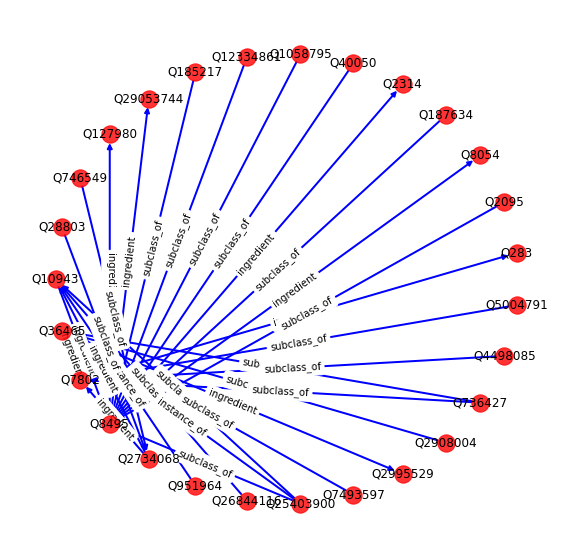

In [20]:
# positions for all nodes
pos = nx.shell_layout(G_test)
plt.figure(figsize=(10,10))
# nodes
nx.draw_networkx_nodes(G_test, pos, node_color='r', node_size=300, alpha=0.8)
# edges
nx.draw_networkx_edges(G_test, pos, edgelist=G_test.edges(), width=2,alpha=1,edge_color='b')

# label edges
labels = dict()
for index, row in test.iterrows():
    if not pd.isna(row['instance_of']):
        labels[(row['instance_of'],row['food/drink'])] = 'instance_of'
    if not pd.isna(row['subclass_of']):
        labels[(row['subclass_of'],row['food/drink'])] = 'subclass_of'
    if not pd.isna(row['ingredient']):
        labels[(row['food/drink'],row['ingredient'])] = 'ingredient'

nx.draw_networkx_edge_labels(G_test,pos,edge_labels = labels, font_size=10)

# label nodes
node_name={}
for node in G_test.nodes():
    node_name[node]=str(node)

nx.draw_networkx_labels(G_test,pos,node_name,font_size=12)

plt.axis('off')
plt.show() # display

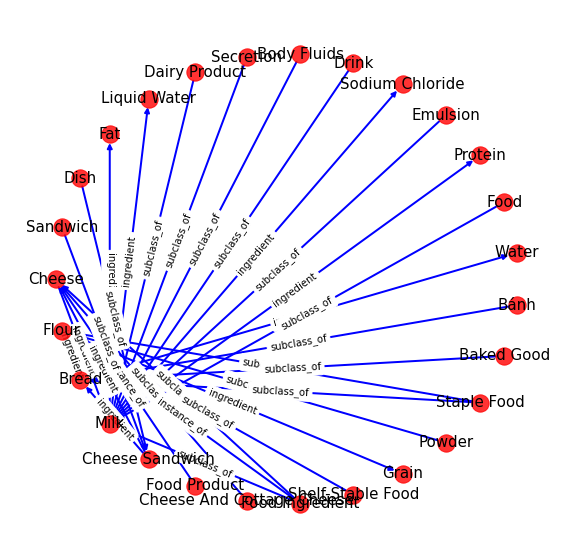

In [21]:
# for display purposes
pos = nx.shell_layout(G_test)
plt.figure(figsize=(10,10))
# nodes
nx.draw_networkx_nodes(G_test, pos, node_color='r', node_size=300, alpha=0.8)
# edges
nx.draw_networkx_edges(G_test, pos, edgelist=G_test.edges(), width=2,alpha=1,edge_color='b')


# label edges
labels = dict()
for index, row in test.iterrows():
    if not pd.isna(row['instance_of']):
        labels[(row['instance_of'],row['food/drink'])] = 'instance_of'
    if not pd.isna(row['subclass_of']):
        labels[(row['subclass_of'],row['food/drink'])] = 'subclass_of'
    if not pd.isna(row['ingredient']):
        labels[(row['food/drink'],row['ingredient'])] = 'ingredient'

nx.draw_networkx_edge_labels(G_test,pos,edge_labels = labels, font_size=10)


# label node
node_name={}
for node in G_test.nodes():
    if node in lang_dict.keys():
        node_name[node]=lang_dict[node]['en']
    else:
        node_name[node]= str(node)

nx.draw_networkx_labels(G_test,pos,node_name,font_size=15)

plt.axis('off')
plt.show() # display

In [22]:
G.neighbors('Q10943')

In [23]:
l =list(nx.degree(G))
most_connected = max(l,key=lambda x: x[1])

In [24]:
G.nodes[most_connected[0]]['en']

'Food'

## Find Allergen

In [25]:
# Graph Setup
G_sub = nx.DiGraph()
# Nodes
node_names = dict()
food_nodes = list(zip(df['food/drink'], df['food/drinkLabel']))
for names in food_nodes:
    node_names[names[0]] = names[1]
G_sub.add_nodes_from(node_names)
# Edges
for index, row in df.iterrows():
    if not pd.isna(row['ingredient']):
        G_sub.add_edge(row['food/drink'],row['ingredient'])
nx.set_node_attributes(G_sub, lang_dict)

In [26]:
l =list(nx.degree(G_sub))
most_connected = max(l,key=lambda x: x[1])
G_sub.nodes[most_connected[0]]['en']

'Flour'

In [27]:
def find_node(G, language, name):

    result = []

    d = nx.get_node_attributes(G, language)

    for key, v in d.items():
        if(v == name):
            result.append(key)

    return result

In [28]:
find_node(G_sub, 'en', 'Cheese')

['Q10943']

In [29]:
find_node(G_sub, 'ja', 'チーズ')

['Q10943']

In [30]:
def fetch_connected_nodes(G, node, seen = None):
    if seen == None:
        seen = set([G.nodes[node]['en']])
    for neighbor in G.neighbors(node):
            print(G.nodes[neighbor]['en'])
            if neighbor not in seen:
                seen.add(G.nodes[neighbor]['en'])
                fetch_connected_nodes(G, neighbor, seen)
    return seen

In [31]:
fetch_connected_nodes(G_sub, 'Q2734068', seen = None)

Cheese
Milk
Protein
Sodium Chloride
Liquid Water
Fat
Bread
Flour
Grain
Pseudocereal
Cereal
Water


{'Bread',
 'Cereal',
 'Cheese',
 'Cheese Sandwich',
 'Fat',
 'Flour',
 'Grain',
 'Liquid Water',
 'Milk',
 'Protein',
 'Pseudocereal',
 'Sodium Chloride',
 'Water'}

In [32]:
def find_allergen(G, node):
    ingre = fetch_connected_nodes(G, node, seen = None)
    for item in ingre:
        if item in allergen_dict.keys():
            print(item, ':', allergen_dict[item])

In [33]:
find_allergen(G_sub, 'Q2734068')

Cheese
Milk
Protein
Sodium Chloride
Liquid Water
Fat
Bread
Flour
Grain
Pseudocereal
Cereal
Water
Cheese : Milk Allergy
Milk : Milk Allergy


In [34]:
def fetch_connected_try(G, node, seen = None):
    if seen == None:
        seen = set([node])
    for neighbor in G.neighbors(node):
        if neighbor not in seen:
            seen.add(neighbor)
            fetch_connected_try(G, neighbor, seen)
    return seen

In [35]:
fetch_connected_try(G_sub, 'Q2734068', seen = None)

{'Q10943',
 'Q12117',
 'Q127980',
 'Q2314',
 'Q2734068',
 'Q283',
 'Q29053744',
 'Q2995529',
 'Q36465',
 'Q749997',
 'Q7802',
 'Q8054',
 'Q8495'}

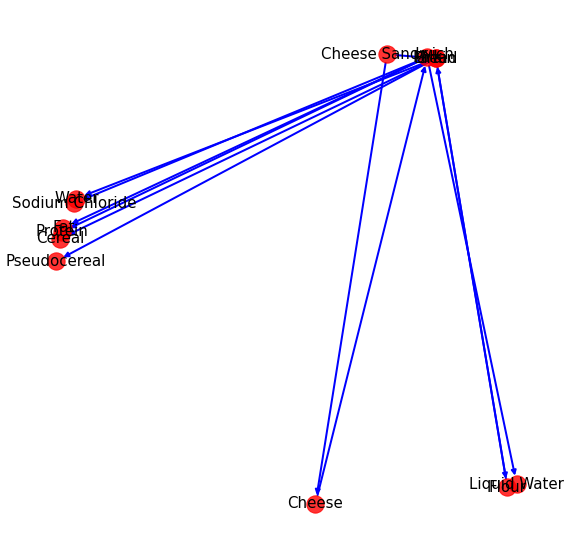

In [36]:
k = G_sub.subgraph(fetch_connected_try(G_sub, 'Q2734068'))

pos = nx.shell_layout(G_sub)
plt.figure(figsize=(10,10))
# nodes
nx.draw_networkx_nodes(k, pos, node_color='r', node_size=300, alpha=0.8)
# edges
nx.draw_networkx_edges(k, pos, edgelist=k.edges(), width=2,alpha=1,edge_color='b')

# label node
node_name={}
for node in k.nodes():
    if node in lang_dict.keys():
        node_name[node]=lang_dict[node]['en']
    else:
        node_name[node]= str(node)

nx.draw_networkx_labels(k,pos,node_name,font_size=15)

plt.axis('off')
plt.show() # display